# CL3 - Intro to CNNs in Keras

Import necessary modules

In [2]:
# The dataset
from keras.datasets import mnist

# Building the model
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D

# One-hot encoding
from keras.utils import np_utils

# Callbacks for training
from keras.callbacks import TensorBoard, EarlyStopping

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline

# Ndarray computations
import numpy as np

Using TensorFlow backend.


### 1. Loading and visualizing the data

Load the data intro training and test sets.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check range.

In [4]:
print('Min:', X_train.min(), '\nMax:', X_train.max())

Min: 0 
Max: 255


Check dimensions.

In [5]:
X_train.shape

(60000, 28, 28)

Take a look at one example.

In [17]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Plot one example.

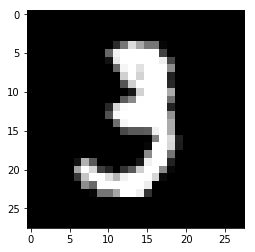

In [18]:
plt.imshow(X_train[10], cmap='gray')

In [19]:
y_train[10]

3

### 2. Preprocessing

Reshape the input dimensions to be `[samples][width][height][channels]`

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [22]:
X_train.shape

(60000, 28, 28, 1)

Normalize inputs to 0-1.

In [23]:
X_train = X_train / 255
X_test = X_test / 255

One hot-encode output.

In [24]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [27]:
y_train[10]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

### 3. Training

Create a tentative model.

In [28]:
def base_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Train it using Keras.

In [29]:
# build the model
model = base_model()

# Fit the model
tb = TensorBoard(log_dir='./logs/initial_setting')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=1024, callbacks=[tb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s - loss: 0.5273 - acc: 0.8663 - val_loss: 0.1956 - val_acc: 0.9449
Epoch 2/15
60000/60000 [==============================] - 1s - loss: 0.1561 - acc: 0.9552 - val_loss: 0.1101 - val_acc: 0.9713
Epoch 3/15
60000/60000 [==============================] - 1s - loss: 0.0977 - acc: 0.9727 - val_loss: 0.0777 - val_acc: 0.9769
Epoch 4/15
60000/60000 [==============================] - 1s - loss: 0.0709 - acc: 0.9803 - val_loss: 0.0599 - val_acc: 0.9819
Epoch 5/15
60000/60000 [==============================] - 1s - loss: 0.0560 - acc: 0.9849 - val_loss: 0.0533 - val_acc: 0.9816
Epoch 6/15
60000/60000 [==============================] - 1s - loss: 0.0474 - acc: 0.9868 - val_loss: 0.0485 - val_acc: 0.9850
Epoch 7/15
60000/60000 [==============================] - 1s - loss: 0.0404 - acc: 0.9886 - val_loss: 0.0451 - val_acc: 0.9854
Epoch 8/15
60000/60000 [==============================] - 1s 

Try different architectures.

In [30]:
def more_layers_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def more_filters_model():
    
    model = Sequential()
    model.add(Conv2D(100, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def more_neurons_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def bnorm_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Train all of them and compare the results using TensorBoard.

In [31]:
model_names = ['more_layers_model', 'more_filters_model', 'more_neurons_model', 'bnorm_model']

for name in model_names:
    print('Training model:',name)
    model = globals()[name]()
    tb = TensorBoard(log_dir='./logs/'+name)
    model.fit(X_train,
              y_train, 
              validation_data=(X_test, y_test),
              epochs=15, 
              batch_size=1024, 
              callbacks=[tb],
              verbose=0)
    print('Done!')

Training model: more_layers_model
Done!
Training model: more_filters_model
Done!
Training model: more_neurons_model
Done!
Training model: bnorm_model
Done!


Choose the best one and train longer. Here we also use [early stopping](https://en.wikipedia.org/wiki/Early_stopping#Validation-based_early_stopping).

In [32]:
model = more_filters_model()

# Set callbacks
tb = TensorBoard(log_dir='./logs/final_model')
estop = EarlyStopping(monitor='val_acc', patience=5)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, callbacks=[tb, estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.4474 - acc: 0.8765 - val_loss: 0.1578 - val_acc: 0.9557
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.1167 - acc: 0.9669 - val_loss: 0.0753 - val_acc: 0.9767
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.0702 - acc: 0.9799 - val_loss: 0.0553 - val_acc: 0.9825
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.0513 - acc: 0.9852 - val_loss: 0.0473 - val_acc: 0.9852
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0419 - acc: 0.9877 - val_loss: 0.0433 - val_acc: 0.9856
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0347 - acc: 0.9897 - val_loss: 0.0392 - val_acc: 0.9870
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0309 - acc: 0.9911 - val_loss: 0.0393 - val_acc: 0.9879
Epoch 8/50
60000/60000 [==============================] - 4s 

### 4. Assessment

Evaluate accuracy on test set.

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy: %.2f%%" % (scores[1]*100))